# Overfitting - Regularization in Regression

### $$J(W) = Cost(X, y, W) + \lambda R(W)$$
$$J(W) = error(\hat{y}, y) + \lambda ||W||_i $$

In [5]:
# %matplotlib inline #Jupyter Notebook
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

import warnings

# plotting setup

In [6]:
# plt.figure(figsize=(10,5), dpi=150)
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 150
plt.style.use('Solarize_Light2')
np.random.seed(42)
np.set_printoptions(precision=2, linewidth=50)

## Regression with Regularization

### Generate data

In [7]:
def f(x):

  """
  This function computes f(x) = 0.2 + np.cos(8 * (x - 1))

  Parameters
  ----------
  x : float
      Input number.

  Returns
  -------
  float
      Result of the function.
  """
  return 0.2 + np.cos(8 * (x - 1))

In [8]:
def generate_data(n_samples=100):
    x = np.sort(np.random.rand(n_samples)) #0.1, 0.2, 0.4, 0.03, 0.12,
    y = f(x) + 0.3 * np.random.randn(n_samples)
    return x, y

/tmp/ipykernel_183838/1556106952.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, s=50, edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)


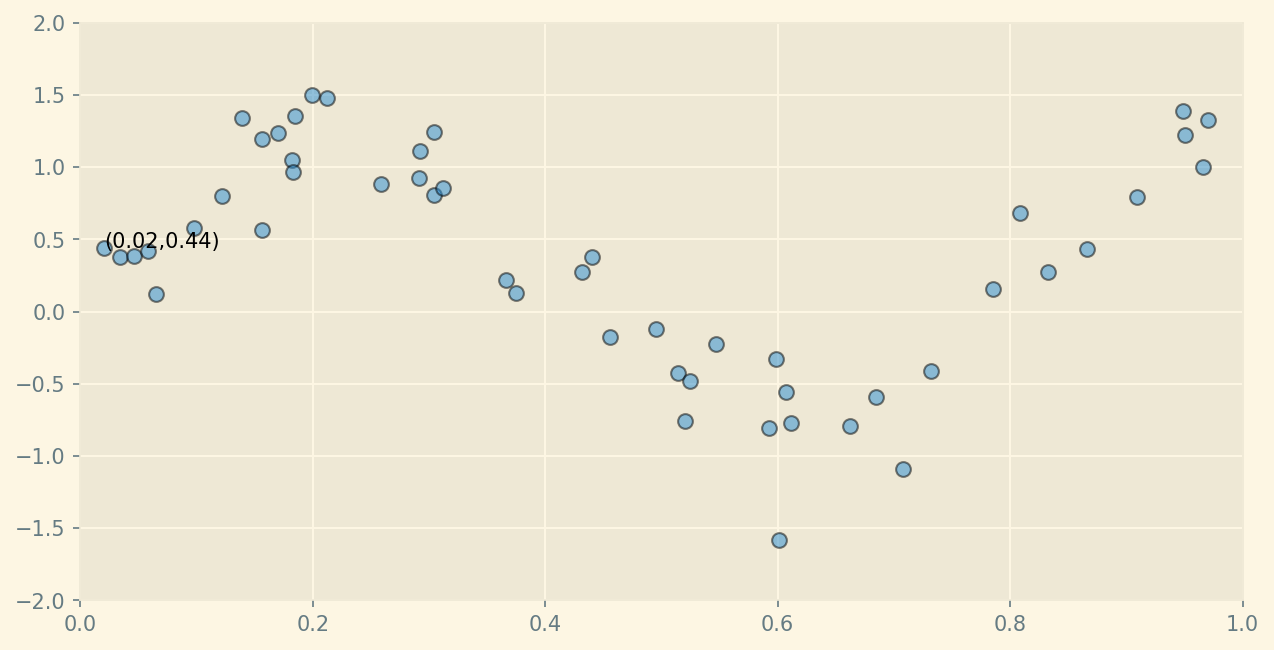

In [9]:
n_samples = 50 # number of data samples
x, y = generate_data(n_samples)

# plot data
plt.figure()
plt.scatter(x, y, s=50, edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.text(x[0], y[0], "(" + str(np.round(x[0], 2))+ "," +str(np.round(y[0], 2))+")")
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()